#### 지도학습 \ 분류(Classification) - 붓꽃의 품종

##### 지도학습 유형 중 분류 문제를 살펴본다. 붓꽃 데이터셋을 학습하여 품종을 판별하는 모델을 만든다.
> ###### http://archive.ics.uci.edu/dataset/53/iris

##### 데이터 로딩

In [25]:
# 라이브러리 환경
import pandas as pd
import numpy as np

In [26]:
# sklearn 데이터셋에서 iris 데이터셋 로딩딩
from sklearn import datasets
iris = datasets.load_iris()

# iris 데이터셋은 딕셔너리 형태이므로, key 값 확인
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
# DESCR 키를 이용하여 데이터셋 설명(Description) 출력
print(iris['DESCR'])    
# 4개의 피처(설명 변수)에는 꽃받침(sepal)과 꽃잎(petal)에 대한 각각의 가로, 세로길이 값이 들어 있다.
# 분류 대상이 되는 목표 레이블은 3가지 범주(클래스)에 속하는 붓꽃 품종을 나타낸다. 
# 이 3가지 품종 중에서 하나를 선택하는 다중 분류(multi classification) 문제이다.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [28]:
# target 속성의 데이터셋 크기
print("데이터셋 크기:", iris["target"].shape)

# target 속성의 데이터셋 내용
print("데이터셋 내용:\n", iris["target"])   # 클래스 0, 1, 2 각각 50개씩 들어 있다.

데이터셋 크기: (150,)
데이터셋 내용:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [29]:
# data 속성의 데이터셋 크기
print("데이터셋 크기:", iris['data'].shape)

# data 속성의 데이터셋 내용(첫 7개 행 추출)
print("데이터셋 내용:\n", iris['data'][:7, :])

데이터셋 크기: (150, 4)
데이터셋 내용:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


In [30]:
# data 속성을 판다스 데이터프레임으로 변환
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])  # iris['data']는 넘파이 배열이므로, 판다스 데이터프레임으로 변환/
                                                                # 각 시리즈가 column이 되어 데이터프레임을 구성하고 각각에 이름 부여
print("데이터프레임의 형태:", df.shape)
df.head()

데이터프레임의 형태: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']  # columns 이름 변경
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [32]:
# Target 열 추가
df['Target'] = iris['target']
print('데이터셋의 크기:', df.shape)
print(df.head(), '\n', df[145:])

데이터셋의 크기: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width  Target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0 
      sepal_length  sepal_width  petal_length  petal_width  Target
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2


##### 데이터 탐색

In [33]:
# 데이터프레임의 기본 정보
df.info()       # non-null: 결측값이 아닌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [34]:
# 통계 정보 요약
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [35]:
# 결측값 확인인
df.isnull().sum()   # 결측값 확인   / sum 메소드가 True를 1로 인식하여 결측값의 개수를 세어준다.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

In [36]:
# 중복 데이터 확인
df.duplicated().sum()   # np.int64(1)   / 1개의 행이 그 전에 있는 행과 중복된 상태이다.

np.int64(1)

In [37]:
# 중복 데이터 출력
df.loc[df.duplicated(), :]  # loc 인덱서의 행 위치에  중복 데이터인지 여부를 표시하는 부울(bool) 값을 입력한다.

,sepal_length,sepal_width,petal_length,petal_width,Target
142,5.8,2.7,5.1,1.9,2


In [38]:
# 중복 데이터 모두 출력
print(df.loc[df.duplicated(keep=False), :])  # keep=False로 설정하면 중복된 모든 행을 출력한다. / by copilot
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9), :]


     sepal_length  sepal_width  petal_length  petal_width  Target
101           5.8          2.7           5.1          1.9       2
142           5.8          2.7           5.1          1.9       2


,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [39]:
# 중복 데이터 제거거
df = df.drop_duplicates()
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2


In [40]:
# 변수 간의 상관 관계 분석
df.corr()   # 상관계수 행렬

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


> ###### 상관계수란 두 변수 사이의 통계적 관계를 나타내기 위해 특정한 상관 관계의 정도를 수치적으로 나타낸 계수이다.

In [41]:
# 시각화 라이브러리 설정
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=0.8) # 폰트 크기 설정

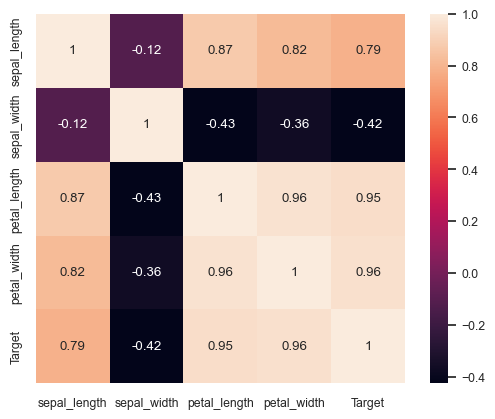

In [42]:
# 상관 계수 히트맵(heatmap)
sns.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()  # 상관계수 히트맵을 통해 변수 간의 상관 관계를 시각화한다.  /  annot=True로 설정하면 각 셀에 상관계수 값을 표시한다.

In [43]:
# Target 값의 분포 - value_counts 메소드
print(df['Target'])
df['Target'].value_counts()

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 149, dtype: int64


Target
0    50
1    50
2    49
Name: count, dtype: int64

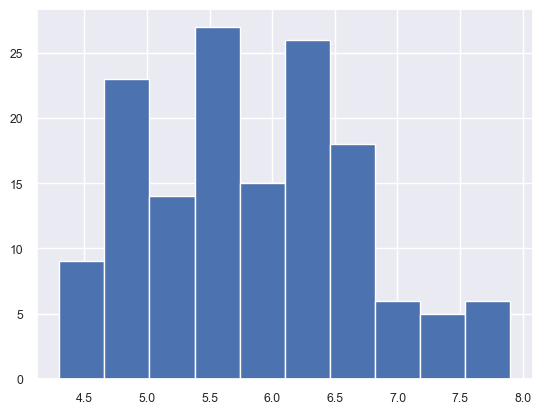

In [50]:
# sepal_length 값의 분포 - hist 함수
plt.hist(x='sepal_length', data=df)
plt.show()

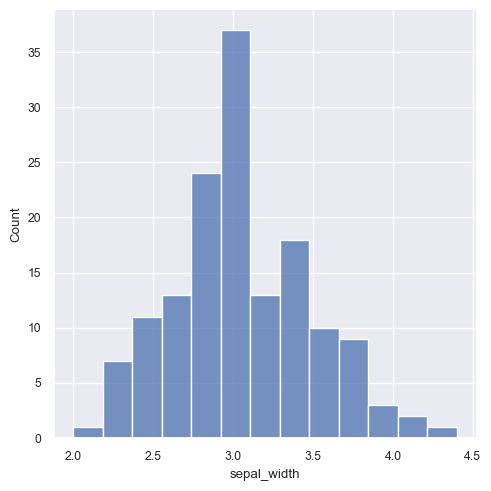

In [ ]:
# sepal_width 값의 분포 - displot 함수(histogram)
sns.displot(x='sepal_width', kind='hist', data=df)  # kind='hist'로 설정하여 히스토그램을 그린다.
plt.show()

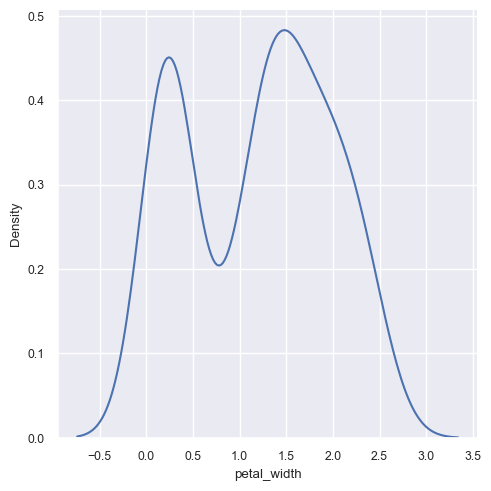

In [ ]:
# petal_width 값의 분포 - displot 함수(kde 밀도 함수 그래프)
sns.displot(x='petal_width', kind='kde', data=df)
plt.show()  # 두 개의 봉우리 형태로 분포된 것을 보아 서로 다른 이질적인 데이터가 섞여 있다고 추정해 볼 수 있다.

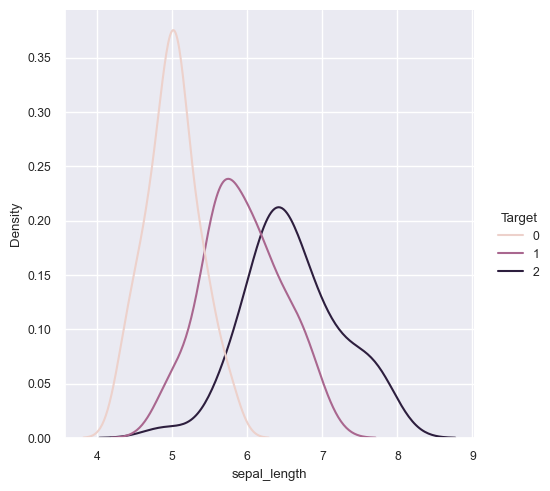

In [ ]:
# 품종별 sepal_length 값의 분포 비교
sns.displot(x='sepal_length', hue='Target', kind='kde', data=df)    # hue 옵션으로 목표 변수인 'Target' 열의 품종(클래스)별로 데이터를 구분하여
                                                                    # kde 밀도 함수 그래프를 그린다.
plt.show()  # 제일 눈에 띄는 Setosa 품종(클래스 0)의 그래프를 통해 해당 품종의 꽃받침 길이가 상대적으로 짧다는 것을 알 수 있다. 
            # 따라서 모델 학습에 고려해야 하는 유의미한 피처로 판단된다.